In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados_df = pd.read_csv('Dados-RS.csv', delimiter=';')
dados_df.drop_duplicates(inplace=True)

In [3]:
dados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 32 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   document_id                               999999 non-null  object 
 1   paciente_id                               999999 non-null  object 
 2   paciente_idade                            999999 non-null  int64  
 3   paciente_dataNascimento                   999999 non-null  object 
 4   paciente_enumSexoBiologico                999999 non-null  object 
 5   paciente_racaCor_codigo                   999999 non-null  int64  
 6   paciente_racaCor_valor                    999999 non-null  object 
 7   paciente_endereco_coIbgeMunicipio         995387 non-null  float64
 8   paciente_endereco_coPais                  995402 non-null  float64
 9   paciente_endereco_nmMunicipio             995401 non-null  object 
 10  paciente_endereco_nm

In [35]:
# doses aplicadas por município
doses_mun = dados_df['estabelecimento_municipio_nome'].value_counts()
doses_mun

estabelecimento_municipio_nome
PORTO ALEGRE      144939
CAXIAS DO SUL      42219
PELOTAS            32682
CANOAS             32557
SANTA MARIA        23953
                   ...  
GENTIL               124
MONTAURI             124
QUATRO IRMAOS        117
TUPANCI DO SUL       116
UNIAO DA SERRA       106
Name: count, Length: 497, dtype: int64

In [36]:
dados_df['vacina_fabricante_nome'] = dados_df['vacina_fabricante_nome'].replace('PFIZER - PEDI?TRICA', 'PFIZER - PEDIÁTRICA')
dados_df['vacina_fabricante_nome'] = dados_df['vacina_fabricante_nome'].replace('Pendente Identifica??o', 'Pendente Identificação')
dados_df['vacina_fabricante_nome'] = dados_df['vacina_fabricante_nome'].replace('PFIZER - PEDIÁTRICA MENOR DE 5 ANOS', 'PFIZER - PEDIÁTRICA')
doses_fab = dados_df[['vacina_fabricante_nome','vacina_codigo']].groupby('vacina_fabricante_nome').count()

doses_fab

,vacina_codigo
vacina_fabricante_nome,
ASTRAZENECA,13557
ASTRAZENECA/FIOCRUZ,257397
BUTANTAN,79655
FUNDACAO OSWALDO CRUZ,1
JANSSEN,48706
PFIZER,396375
PFIZER - PEDIÁTRICA,14979
Pendente Identificação,23930
SINOVAC,756


<Axes: xlabel='vacina_dataAplicacao'>

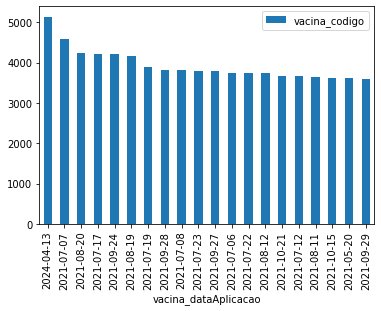

In [37]:
dados_df['vacina_dataAplicacao'] = dados_df['vacina_dataAplicacao'].replace('1989-02-16','2023-02-16')
dados_df['vacina_dataAplicacao'] = dados_df['vacina_dataAplicacao'].replace('1994-08-28','2024-08-28')
doses_data = dados_df[['vacina_dataAplicacao','vacina_codigo']].groupby('vacina_dataAplicacao').count()
doses_data = doses_data.sort_values('vacina_codigo', ascending=False)

doses_data = doses_data.head(20)
doses_data.plot(kind='bar')

In [7]:
# Doses aplicadas em PF E seu fabricante
doses_pf = dados_df.loc[dados_df['estabelecimento_municipio_nome'] == 'PASSO FUNDO', ['estabelecimento_municipio_nome','vacina_fabricante_nome']]
doses_pf

,estabelecimento_municipio_nome,vacina_fabricante_nome
89,PASSO FUNDO,JANSSEN
202,PASSO FUNDO,PFIZER
262,PASSO FUNDO,ASTRAZENECA
321,PASSO FUNDO,PFIZER
337,PASSO FUNDO,ASTRAZENECA/FIOCRUZ
...,...,...
999817,PASSO FUNDO,PFIZER
999884,PASSO FUNDO,SINOVAC/BUTANTAN
999894,PASSO FUNDO,ASTRAZENECA/FIOCRUZ
999918,PASSO FUNDO,PFIZER


In [8]:
# quantas doses cada paciente tomou da vacina
doses_pf = dados_df.loc[dados_df['estabelecimento_municipio_nome'] == 'PASSO FUNDO']
doses_pf

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
89,43b2a8c4-de72-4738-9c9b-93f0feac2400-i0b0,29865e316c903f23751c9ce7e773e71ca7683f1e4ef21b...,24,1997-10-03,F,1,BRANCA,432090.0,10.0,TAPEJARA,...,9.0,Trabalhadores de Saúde,205J21A,JANSSEN,Organization/30587,2022-06-14,2º Reforço,88,COVID-19 JANSSEN - Ad26.COV2.S,Novo PNI
202,ab3892c3-b111-4798-ad47-ac9ba0935e8f-i0b0,f56a54df3c976504076fbe80c69af7d20412b825afbb19...,23,1999-12-27,F,99,SEM INFORMACAO,432090.0,10.0,TAPEJARA,...,9.0,Trabalhadores de Saúde,GJ2553,PFIZER,28290,2023-03-30,Reforço,103,COVID-19 PFIZER - COMIRNATY BIVALENTE,Novo PNI
262,ab747e82-c22a-4071-826d-3abd927e9232-i0b0,c43435a20b460b639bb454c4b94855552e479dec6e5dd7...,90,1930-12-15,F,99,SEM INFORMACAO,431410.0,10.0,PASSO FUNDO,...,2.0,Faixa Etária,ABW4735,ASTRAZENECA,Organization/00394544000851,2021-05-18,2ª Dose,89,COVID-19 ASTRAZENECA - ChAdOx1-S,Novo PNI
321,44822326-ebaf-4f21-adce-1365b9b87398-i0b0,2384e4dd2f46fe6903e6b5a7cdc01f1f48940b5397ad72...,15,2006-04-16,M,1,BRANCA,431410.0,10.0,PASSO FUNDO,...,2.0,Faixa Etária,FK0596,PFIZER,Organization/00394544000851,2021-11-22,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
337,4499a495-8ae5-4e95-80e2-288a2fc89b13-i0b0,555f16c73e1a646ee06ab6cd39dca8d8f4bf794a059e2b...,61,1960-03-02,M,1,BRANCA,431490.0,10.0,PORTO ALEGRE,...,2.0,Faixa Etária,215VCD169Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-07-14,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999817,972bd39a-13d9-4844-96d9-9c5e9f2bf04a-i0b0,2e9e84f84b55b712040edc2078ca24f1fe7558f566a7c6...,14,2007-07-10,F,1,BRANCA,431410.0,10.0,PASSO FUNDO,...,2.0,Faixa Etária,FK9412,PFIZER,Organization/28290,2022-01-14,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
999884,1d478ebe-2292-4aea-8bcd-0215e30e3ce2-i0b0,0e319fa5fbf00cf678b00822b5bb3e25510d7f95c4edab...,37,1983-08-31,F,1,BRANCA,431410.0,10.0,PASSO FUNDO,...,9.0,Trabalhadores de Saúde,210010,SINOVAC/BUTANTAN,Organization/61189445000156,2021-03-02,2ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI
999894,41cf11f6-43b4-4790-9b6e-a929e505e2c9-i0b0,45db2463da673a7c5dd952bb4806d843456cda271c5fbb...,30,1991-01-25,F,1,BRANCA,431410.0,10.0,PASSO FUNDO,...,9.0,Trabalhadores de Saúde,216VCD219W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-08-17,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
999918,8ee16692-212d-4054-94e5-d6e440852a7d-i0b0,d753bc3e43480824c85e98255014f81e8490c704985648...,47,1974-07-26,M,1,BRANCA,431410.0,10.0,PASSO FUNDO,...,2.0,Faixa Etária,FK9412,PFIZER,Organization/28290,2022-01-18,Reforço,87,COVID-19 PFIZER - COMIRNATY,Novo PNI


In [9]:
qtd_doses = doses_pf['paciente_id'].value_counts()
qtd_doses

paciente_id
fcc688eeed56a800c10e0724e4190889082dd5ad75974f14ed9b8c7aae9c4640    4
f56d1bc1c84c3edfe21db33f7f880768ded416b02ee52c5795ab08a509431a0e    3
fb52d1ae334be9e23c7012c327457fae7903c326b69ccd53612af44580238f1b    3
e5cfff8081eab5fdbca029f067e26decea15f8ac5f9c0720068639b3ac02770a    3
0b191675f0fd3e1a6138471c1c137cb2ee8e61fb218af6e39ca4e93d2bbc6cfe    3
                                                                   ..
e8c5a07c89bbc80b6792b208c92e005e945e6472b31282a954aee5605da6e446    1
d5dc0081501a667e77b0e837669fccaf0402cedf82e98184e69b0b8aa13a55b6    1
b48ccbd5b34608dd68d13aebbad8fd9d33a65a3252e3dd430804262f2e455f81    1
f64ea104d8d799c87f3eb91d258598a38e9b179afda2c412b672b6cac77ac74b    1
a1df0b4d597c091d95ab2a85d3a777d2824e1b865269b6602540848640d78d5c    1
Name: count, Length: 17251, dtype: int64

In [10]:
contagem_doses = dados_df['estabelecimento_municipio_nome'].value_counts().head(10)
contagem_doses

estabelecimento_municipio_nome
PORTO ALEGRE     144939
CAXIAS DO SUL     42219
PELOTAS           32682
CANOAS            32557
SANTA MARIA       23953
GRAVATAI          23913
VIAMAO            22538
RIO GRANDE        20268
NOVO HAMBURGO     18727
SAO LEOPOLDO      18405
Name: count, dtype: int64

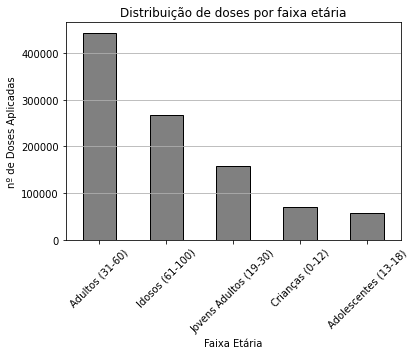

In [11]:
# distribuição por faixa etária
dados_df['faixa_etaria'] = pd.cut(dados_df['paciente_idade'], 
                                  bins=[0,12,18,30,60,100], 
                                  labels=['Crianças (0-12)', 'Adolescentes (13-18)', 'Jovens Adultos (19-30)', 'Adultos (31-60)', 'Idosos (61-100)'])

faixa_etaria_contagem = dados_df['faixa_etaria'].value_counts()

faixa_etaria_contagem.plot(kind='bar', color='gray', edgecolor='black')

plt.title("Distribuição de doses por faixa etária")
plt.xlabel("Faixa Etária")
plt.ylabel("nº de Doses Aplicadas")
plt.xticks(rotation=45)
plt.grid(axis='y')

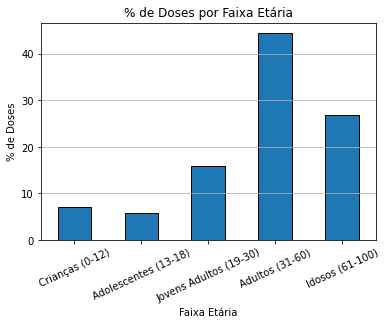

In [12]:
data = {
    'Categoria': ['Crianças (0-12)', 'Adolescentes (13-18)', 'Jovens Adultos (19-30)', 'Adultos (31-60)', 'Idosos (61-100)'],
    'Quantidade': [75255, 61762, 169212, 475449, 287446]
}

df_data = pd.DataFrame(data)
unidades_total = df_data['Quantidade'].sum()
df_data['Porcentagem'] = (df_data['Quantidade'] / unidades_total) * 100
df_data.set_index('Categoria')['Porcentagem'].plot(kind='bar', edgecolor='black')

plt.title('% de Doses por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('% de Doses')
plt.xticks(rotation=25)
plt.grid(axis='y')


<Axes: ylabel='count'>

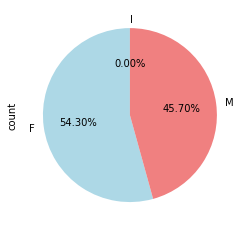

In [13]:
sexo_contagem = dados_df['paciente_enumSexoBiologico'].value_counts()
sexo_contagem.plot(kind='pie', startangle=90, autopct='%1.2f%%', colors=['lightblue','lightcoral'])

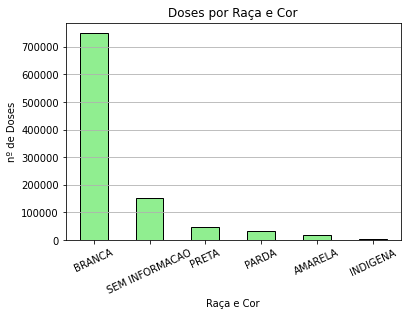

In [14]:
doses_raca_cor = dados_df['paciente_racaCor_valor'].value_counts()
doses_raca_cor.plot(kind='bar',color='lightgreen', edgecolor='black')

plt.title('Doses por Raça e Cor')
plt.xlabel('Raça e Cor')
plt.ylabel('nº de Doses')
plt.xticks(rotation=25)
plt.grid(axis='y')

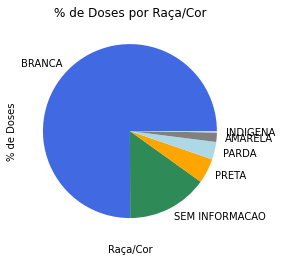

In [15]:
dados = doses_raca_cor.to_dict()

_dict = {
    'Raça': [],
    'Qtde': []
}
for key, value in dados.items():
    _dict['Raça'].append(key)
    _dict['Qtde'].append(value)

dados = _dict

# Percentual de raça e cor
raca_cor = pd.DataFrame(dados)
total = raca_cor['Qtde'].sum()
raca_cor['Percentual'] = (raca_cor['Qtde'] / total) * 100

raca_cor.set_index('Raça')['Percentual'].plot(kind='pie', colors=['royalblue','seagreen','orange','lightblue','gray','lightgray'])

plt.title('% de Doses por Raça/Cor')
plt.xlabel('Raça/Cor')
plt.ylabel('% de Doses')
plt.xticks(rotation=25)
plt.grid(axis='y')

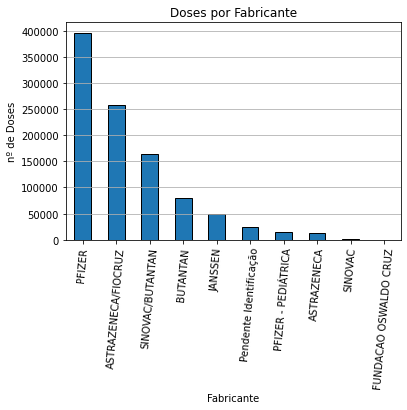

In [16]:
# Contagem por fabricante
contagem_fabric = dados_df['vacina_fabricante_nome'].value_counts().head(10)
#contagem_fabric

contagem_fabric.plot(kind='bar', edgecolor='black')

plt.title('Doses por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('nº de Doses')
plt.xticks(rotation=85)
plt.grid(axis='y')

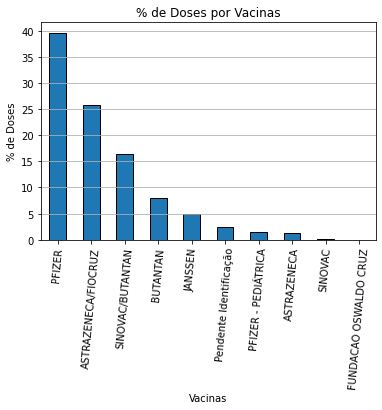

In [17]:
dados = contagem_fabric.to_dict()

_dict = {
    'Vacina': [],
    'Qtde': []
}
for key, value in dados.items():
    _dict['Vacina'].append(key)
    _dict['Qtde'].append(value)

dados = _dict

vacina_df = pd.DataFrame(dados)

total = vacina_df['Qtde'].sum()

vacina_df['Percentual'] = (vacina_df['Qtde'] / total) * 100

vacina_df.set_index('Vacina')['Percentual'].plot(kind='bar', edgecolor='black')

plt.title('% de Doses por Vacinas')
plt.xlabel('Vacinas')
plt.ylabel('% de Doses')
plt.xticks(rotation=85)
plt.grid(axis='y')

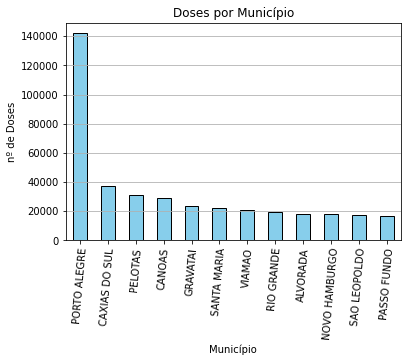

In [18]:
contagem_mun = dados_df['paciente_endereco_nmMunicipio'].value_counts().head(12)
contagem_mun.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Doses por Município')
plt.xlabel('Município')
plt.ylabel('nº de Doses')
plt.xticks(rotation=85)
plt.grid(axis='y')

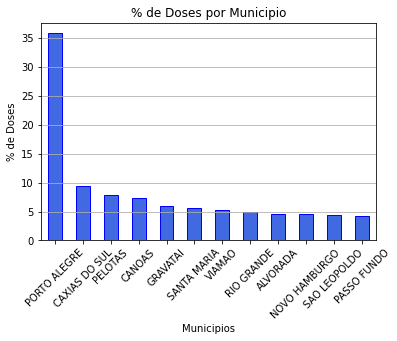

In [19]:
dados = contagem_mun.to_dict()

_dict = {
    'Municipio': [],
    'Qtde': []
}
for key, value in dados.items():
    _dict['Municipio'].append(key)
    _dict['Qtde'].append(value)

dados = _dict

mun_df = pd.DataFrame(dados)

total = mun_df['Qtde'].sum()

mun_df['Percentual'] = (mun_df['Qtde'] / total) * 100

mun_df.set_index('Municipio')['Percentual'].plot(kind='bar', color='royalblue', edgecolor='blue')

plt.title('% de Doses por Municipio')
plt.xlabel('Municipios')
plt.ylabel('% de Doses')
plt.xticks(rotation=45)
plt.grid(axis='y')

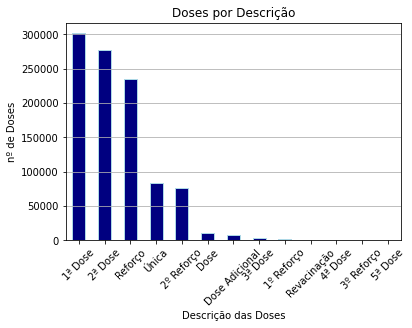

In [20]:
dados_df['vacina_descricao_dose'] = dados_df['vacina_descricao_dose'].replace('2ª Dose Revacinação','2ª Dose')
dados_df['vacina_descricao_dose'] = dados_df['vacina_descricao_dose'].replace('1ª Dose Revacinação','1ª Dose')
dados_df['vacina_descricao_dose'] = dados_df['vacina_descricao_dose'].replace('Dose Inicial','1ª Dose')
dados_df['vacina_descricao_dose'] = dados_df['vacina_descricao_dose'].replace('3ª Dose Revacinação','3ª Dose')
dados_df['vacina_descricao_dose'] = dados_df['vacina_descricao_dose'].replace('4ª Dose Revacinação','4ª Dose')
dados_df['vacina_descricao_dose'] = dados_df['vacina_descricao_dose'].replace('5ª Dose Revacinação','5ª Dose')
doses = dados_df['vacina_descricao_dose'].value_counts()

doses.plot(kind='bar', color='navy', edgecolor='lightblue')

plt.title('Doses por Descrição')
plt.xlabel('Descrição das Doses')
plt.ylabel('nº de Doses')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.savefig(fname='Doses Por Descrição das Doses.png', dpi=300,)

In [21]:
doses

vacina_descricao_dose
1ª Dose           301666
2ª Dose           277286
Reforço           234898
Única              83924
2º Reforço         76806
Dose               10893
Dose Adicional      8040
3ª Dose             3026
1º Reforço          1715
Revacinação          704
4ª Dose              508
3º Reforço           508
5ª Dose               12
Name: count, dtype: int64

Text(0, 0.5, '% de Doses')

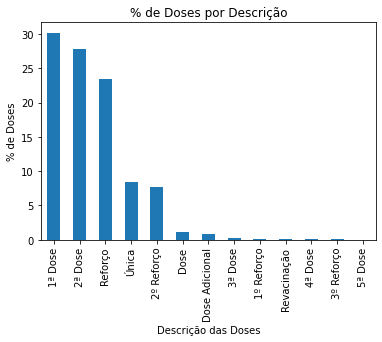

In [22]:
dados = doses.to_dict()

_dict = {
    'Descrição': [],
    'Qtde': []
}
for key, value in dados.items():
    _dict['Descrição'].append(key)
    _dict['Qtde'].append(value)

dados = _dict

descr_dose = pd.DataFrame(dados)

total = descr_dose['Qtde'].sum()

descr_dose['Percentual'] = (descr_dose['Qtde'] / total) * 100

descr_dose.set_index('Descrição')['Percentual'].plot(kind='bar')

plt.title('% de Doses por Descrição')
plt.xlabel('Descrição das Doses')
plt.ylabel('% de Doses')

In [23]:
vacinas_poa = dados_df[dados_df['paciente_endereco_nmMunicipio'] == 'PORTO ALEGRE']
vacinas_count = vacinas_poa['vacina_fabricante_nome'].value_counts()
dados = vacinas_count.to_dict()

_dict = {
    'Vacina': [],
    'Qtde': []
}
for key, value in dados.items():
    _dict['Vacina'].append(key)
    _dict['Qtde'].append(value)
print(_dict)

{'Vacina': ['PFIZER', 'ASTRAZENECA/FIOCRUZ', 'SINOVAC/BUTANTAN', 'BUTANTAN', 'JANSSEN', 'Pendente Identificação', 'PFIZER - PEDIÁTRICA', 'ASTRAZENECA', 'SINOVAC'], 'Qtde': [60534, 30265, 23257, 10878, 8422, 4546, 2590, 1424, 90]}


In [24]:
vacinas_count

vacina_fabricante_nome
PFIZER                    60534
ASTRAZENECA/FIOCRUZ       30265
SINOVAC/BUTANTAN          23257
BUTANTAN                  10878
JANSSEN                    8422
Pendente Identificação     4546
PFIZER - PEDIÁTRICA        2590
ASTRAZENECA                1424
SINOVAC                      90
Name: count, dtype: int64

Text(0, 0.5, '% de Doses')

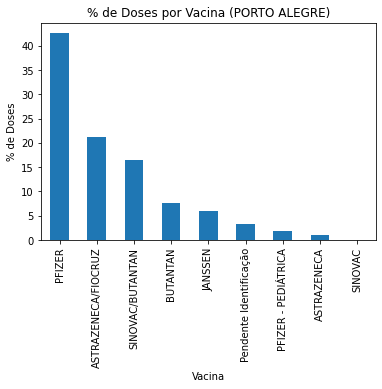

In [25]:
dados = _dict
vacina_poa_pct = pd.DataFrame(dados)

total = vacina_poa_pct['Qtde'].sum()

vacina_poa_pct['Percentual'] = (vacina_poa_pct['Qtde'] / total) * 100

vacina_poa_pct.set_index('Vacina')['Percentual'].plot(kind='bar')

plt.title('% de Doses por Vacina (PORTO ALEGRE)')
plt.xlabel('Vacina')
plt.ylabel('% de Doses')

In [26]:
vacina_poa_pct.describe()

,Qtde,Percentual
count,9.000000,9.000000
mean,15778.444444,11.111111
std,19682.672291,13.860451
min,90.000000,0.063378
25%,2590.000000,1.823867
50%,8422.000000,5.930735
75%,23257.000000,16.377477
max,60534.000000,42.627776
